In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-03-05_38_29/log.json', 'r') as f:
    data = json.load(f)
    
l = len(data["loss"])
print(f"{l} records")
print(data.keys())

26001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(math.trunc(float(current - previous))), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

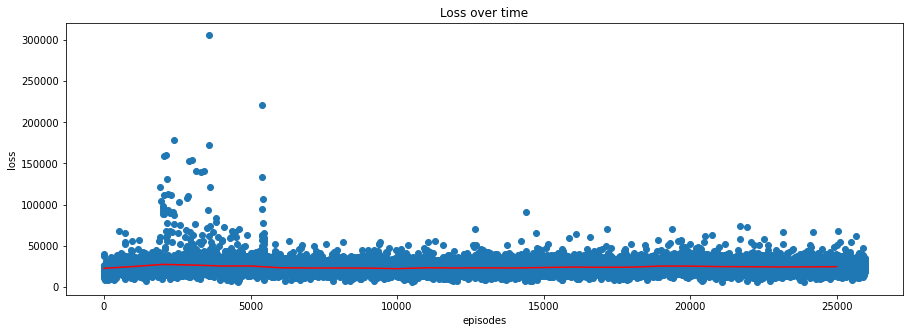

Maximum: 305870.15625
Average: 23942.535123270693
Moving Average: ['+9% (2172 | 9%)', '+10% (2596 | 21%)', '-2% (-790 | 17%)', '-4% (-1126 | 12%)', '0% (-21 | 12%)', '-8% (-2175 | 2%)', '-1% (-290 | 1%)', '0% (-8 | 1%)', '0% (-98 | 1%)', '-3% (-681 | -1%)', '+4% (1061 | 2%)', '-1% (-248 | 1%)', '+0% (172 | 2%)', '0% (-170 | 1%)', '+2% (575 | 4%)', '+2% (528 | 6%)', '-1% (-289 | 5%)', '+0% (224 | 6%)', '+5% (1274 | 12%)', '0% (-45 | 11%)', '-2% (-600 | 9%)', '0% (-153 | 8%)', '-1% (-270 | 7%)', '+0% (91 | 7%)', '+0% (240 | 8%)']
Minimum: 5209.70751953125


In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

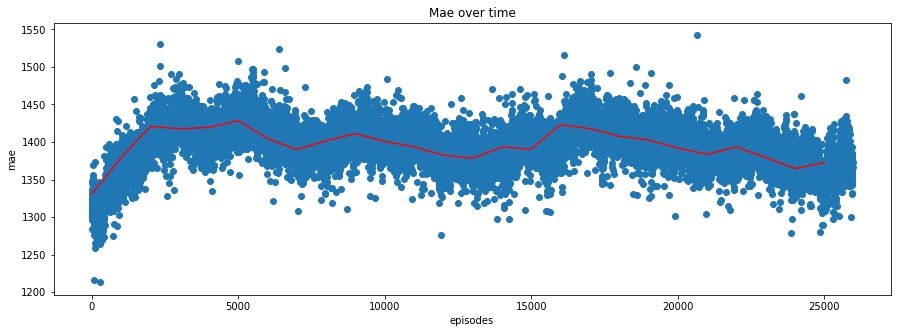

Maximum: 1542.06640625
Average: 1395.4250716638576
Moving Average: ['+3% (48 | 3%)', '+3% (42 | 6%)', '0% (-3 | 6%)', '+0% (1 | 6%)', '+0% (9 | 7%)', '-1% (-23 | 5%)', '-1% (-14 | 4%)', '+0% (11 | 5%)', '+0% (9 | 6%)', '0% (-10 | 5%)', '0% (-7 | 4%)', '0% (-10 | 3%)', '0% (-4 | 3%)', '+1% (14 | 4%)', '0% (-2 | 4%)', '+2% (32 | 6%)', '0% (-5 | 6%)', '0% (-10 | 5%)', '0% (-5 | 5%)', '0% (-10 | 4%)', '0% (-8 | 3%)', '+0% (9 | 4%)', '-1% (-13 | 3%)', '-1% (-14 | 2%)', '+0% (7 | 3%)']
Minimum: 1213.0626220703125


In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

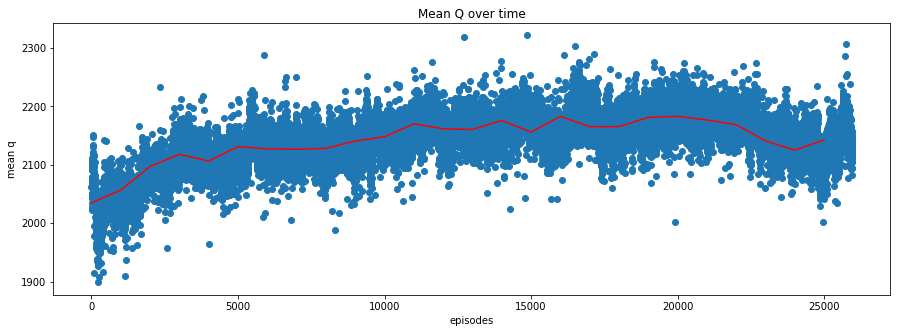

Maximum: 2321.509765625
Average: 2141.1677827659114
Moving Average: ['+1% (21 | 1%)', '+1% (40 | 3%)', '+0% (20 | 4%)', '0% (-11 | 3%)', '+1% (24 | 4%)', '0% (-4 | 4%)', '0% (0 | 4%)', '+0% (1 | 4%)', '+0% (12 | 5%)', '+0% (7 | 5%)', '+1% (22 | 6%)', '0% (-8 | 6%)', '0% (-1 | 6%)', '+0% (15 | 6%)', '0% (-20 | 5%)', '+1% (26 | 7%)', '0% (-17 | 6%)', '+0% (0 | 6%)', '+0% (15 | 7%)', '+0% (1 | 7%)', '0% (-6 | 6%)', '0% (-8 | 6%)', '-1% (-27 | 5%)', '0% (-15 | 4%)', '+0% (17 | 5%)']
Minimum: 1898.6728515625


In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

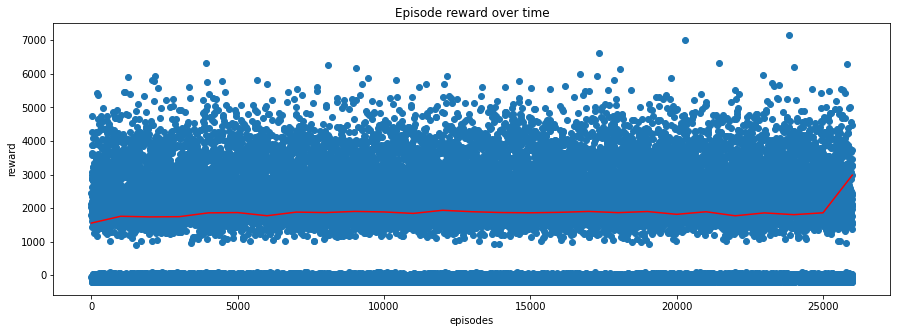

Maximum: 7145.78974358941
Average: 1836.5944567218817
Moving Average: ['+13% (202 | 13%)', '-1% (-18 | 11%)', '+0% (6 | 12%)', '+6% (113 | 19%)', '+0% (8 | 20%)', '-5% (-94 | 14%)', '+6% (108 | 21%)', '0% (-13 | 20%)', '+1% (34 | 22%)', '0% (-15 | 21%)', '-2% (-43 | 18%)', '+5% (92 | 24%)', '-2% (-41 | 21%)', '-1% (-25 | 20%)', '0% (-7 | 19%)', '+0% (13 | 20%)', '+1% (26 | 22%)', '-1% (-35 | 20%)', '+1% (33 | 22%)', '-4% (-83 | 16%)', '+4% (76 | 21%)', '-6% (-120 | 13%)', '+4% (86 | 19%)', '-2% (-52 | 16%)', '+3% (55 | 19%)', '+60% (1122 | 91%)']
Minimum: -215.68666666666667


In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

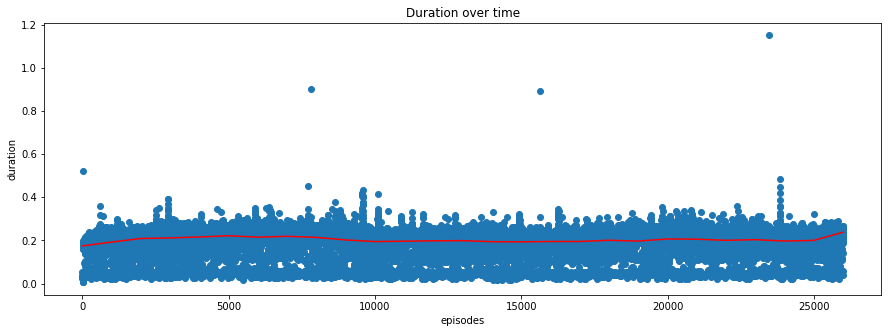

Maximum: 1.1498980769974878
Average: 0.201742229995854
Moving Average: ['+10% (0 | 10%)', '+8% (0 | 19%)', '+1% (0 | 21%)', '+2% (0 | 23%)', '+2% (0 | 27%)', '-2% (0 | 23%)', '+1% (0 | 25%)', '-2% (0 | 22%)', '-5% (0 | 15%)', '-3% (0 | 11%)', '+0% (0 | 12%)', '+0% (0 | 13%)', '+0% (0 | 14%)', '-2% (0 | 11%)', '0% (0 | 10%)', '+0% (0 | 11%)', '+0% (0 | 11%)', '+2% (0 | 15%)', '-1% (0 | 12%)', '+4% (0 | 18%)', '0% (0 | 17%)', '-2% (0 | 14%)', '+1% (0 | 16%)', '-3% (0 | 13%)', '+1% (0 | 14%)', '+19% (0 | 36%)']
Minimum: 0.004967294000380207


In [9]:
plot(duration, "Duration over time", "episodes", "duration")

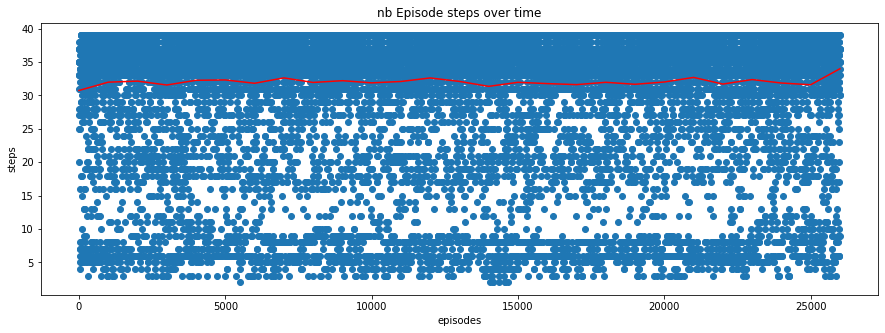

Maximum: 39
Average: 31.964155224799047
Moving Average: ['+4% (1 | 4%)', '+0% (0 | 4%)', '-1% (0 | 2%)', '+2% (0 | 4%)', '+0% (0 | 5%)', '-1% (0 | 3%)', '+2% (0 | 6%)', '-2% (0 | 3%)', '+0% (0 | 4%)', '-1% (0 | 3%)', '+0% (0 | 4%)', '+1% (0 | 6%)', '-1% (0 | 4%)', '-2% (0 | 2%)', '+1% (0 | 3%)', '0% (0 | 3%)', '0% (0 | 2%)', '+1% (0 | 3%)', '0% (0 | 3%)', '+1% (0 | 4%)', '+2% (0 | 6%)', '-3% (0 | 3%)', '+2% (0 | 5%)', '-1% (0 | 3%)', '0% (0 | 2%)', '+7% (2 | 10%)']
Minimum: 2


In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")